In [206]:
import pandas as pd
import os
import numpy as np

os.environ["NUMBER_OF_PROCESSORS"] = '2'

import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [207]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"

column_names = [
    "Class", "Age", "Menopause", "Tumor_Size", "Inv_Nodes", "Node_Caps", "Deg_Malig",
    "Breast", "Breast_Quad", "Irradiat"
]

bc_df = pd.read_csv(url, header=None, names=column_names, na_values="?")

bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   Age          286 non-null    object
 2   Menopause    286 non-null    object
 3   Tumor_Size   286 non-null    object
 4   Inv_Nodes    286 non-null    object
 5   Node_Caps    278 non-null    object
 6   Deg_Malig    286 non-null    int64 
 7   Breast       286 non-null    object
 8   Breast_Quad  285 non-null    object
 9   Irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [208]:
bc_df.columns.tolist()

['Class',
 'Age',
 'Menopause',
 'Tumor_Size',
 'Inv_Nodes',
 'Node_Caps',
 'Deg_Malig',
 'Breast',
 'Breast_Quad',
 'Irradiat']

In [212]:
bc_df.head(5)

,Class,Age,Menopause,Tumor_Size,Inv_Nodes,Node_Caps,Deg_Malig,Breast,Breast_Quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [213]:
#Dropping columns with non-numeric data
columns_dropped = ['Class', 'Menopause', 'Node_Caps', 'Breast', 'Breast_Quad', 'Irradiat']
bc_df_features = bc_df.drop(columns=columns_dropped, axis = 1)
bc_df_features.head(5)

,Age,Tumor_Size,Inv_Nodes,Deg_Malig
0,30-39,30-34,0-2,3
1,40-49,20-24,0-2,2
2,40-49,20-24,0-2,2
3,60-69,15-19,0-2,2
4,40-49,0-4,0-2,2


In [214]:
#COnverting columns with ranges into an average so the code doesn't freak out
def convert_age_range_to_average(row):
    age_range = row['Age'].split('-')
    lower_bound = int(age_range[0])
    upper_bound = int(age_range[1])
    average_age = (lower_bound + upper_bound) / 2
    return average_age

def convert_tumor_range_to_average(row):
    tumor_range = row['Tumor_Size'].split('-')
    lower_bound = int(tumor_range[0])
    upper_bound = int(tumor_range[1])
    average_tumor = (lower_bound + upper_bound) / 2
    return average_tumor

def convert_node_range_to_average(row):
    node_range = row['Inv_Nodes'].split('-')
    lower_bound = int(node_range[0])
    upper_bound = int(node_range[1])
    average_node = (lower_bound + upper_bound) / 2
    return average_node

bc_df_features['Age'] = bc_df_features.apply(convert_age_range_to_average, axis=1)
bc_df_features['Tumor_Size'] = bc_df_features.apply(convert_tumor_range_to_average, axis=1)
bc_df_features['Inv_Nodes'] = bc_df_features.apply(convert_node_range_to_average, axis=1)


In [215]:
bc_df_features.info


<bound method DataFrame.info of       Age  Tumor_Size  Inv_Nodes  Deg_Malig
0    34.5        32.0        1.0          3
1    44.5        22.0        1.0          2
2    44.5        22.0        1.0          2
3    64.5        17.0        1.0          2
4    44.5         2.0        1.0          2
..    ...         ...        ...        ...
281  34.5        32.0        1.0          2
282  34.5        22.0        1.0          3
283  64.5        22.0        1.0          1
284  44.5        32.0        4.0          3
285  54.5        32.0        4.0          3

[286 rows x 4 columns]>

In [229]:
#Targetting Tumor Size for the Kmeans analysis
bc_df_targ = bc_df_features['Tumor_Size']

In [230]:
k = 3
kmeans = cluster.KMeans(n_clusters=k, n_init = 10)

In [231]:
kmeans.fit(bc_df_features)

KMeans(n_clusters=3, n_init=10)

In [232]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [233]:
labels

array([1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0,
       2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2,
       2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1,
       1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1,
       1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0,
       0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 2])

In [234]:
pd.crosstab(bc_df_targ, labels)

col_0,0,1,2
Tumor_Size,,,
2.0,6,2,0
7.0,3,1,0
12.0,26,2,0
17.0,20,10,0
22.0,23,27,0
27.0,0,24,30
32.0,0,27,33
37.0,0,11,8
42.0,0,4,18


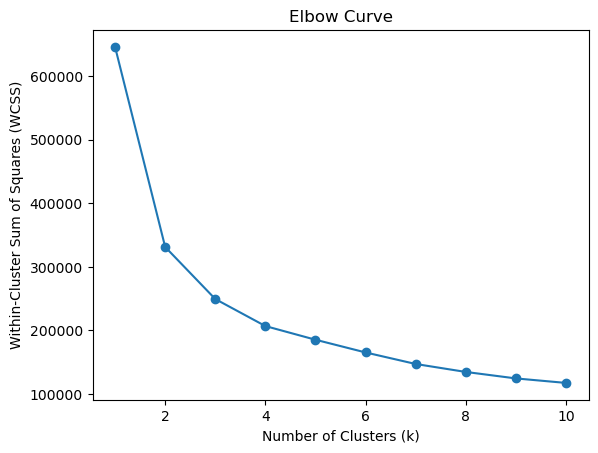

Slope: -42298.322515509935
Intercept: 463444.36809615255


In [235]:
#K-Means clustering for different values of k
k_values = range(1, 11)
wcss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss_values.append(kmeans.inertia_)

#Elbow curve
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Curve')
plt.show()

#Linear Regression
X = np.array(k_values).reshape(-1, 1)
Y = np.array(wcss_values)

regression_model = LinearRegression().fit(X, Y)

slope = regression_model.coef_[0]
intercept = regression_model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
#We choose the optimal k value based on the middle of the bend.
#Seen down below, it appears that 3 is our optimal k value.

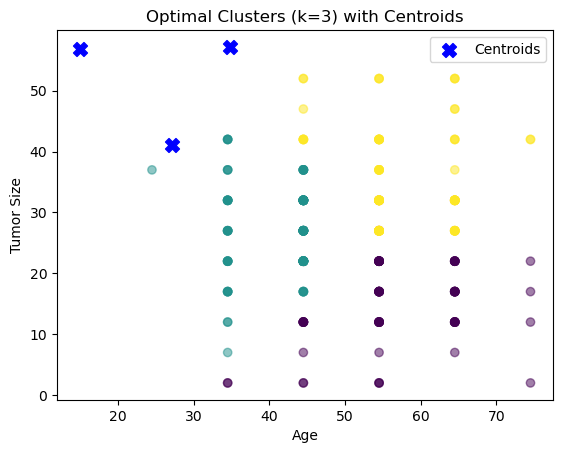

In [242]:
#Based on the elbow of the elbow curve, 3 is optimal k
optimal_k = 3

#KMeans clustering with 3
optimal_kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
optimal_kmeans.fit(bc_df_features[['Tumor_Size', 'Age']])

#Creating the scatter plot with clusters
plt.scatter(bc_df_features['Age'], bc_df_features['Tumor_Size'], c=optimal_kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(optimal_kmeans.cluster_centers_[:, 0], optimal_kmeans.cluster_centers_[:, 1], c='blue', marker='X', s=100, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Tumor Size')
plt.title(f'Optimal Clusters (k={optimal_k}) with Centroids')
plt.legend()
plt.show()

#the centroids are all over the place, but I think that it's because I had to mess with the data so much
#Because all of the columns were ranges, not actual integers, I decided to just take the average of the range,
#so I ended up with some pretty wonky data.  